[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_mog_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Mixture of Gaussians (MoG): quickstart

This notebook gives a short introduction to **MultiMin**: fitting and visualizing **Mixture of Gaussianss (MoG)**.

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


In [2]:
import multimin as mn
mn.show_watermark = True

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")

figprefix = "quickstart"

Welcome to MultiMin v0.10.3. ¡Al infinito y más allá!


## Distribution basics

Below we define and visualize MoGs before using them for fitting.

### Simple gaussians: univariate normal distributions

The simplest case is a mixture of univariate normals. Here we create a MoG with two Gaussian components:

In [3]:
MoG = mn.MixtureOfGaussians(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)
print(MoG)

Composition of ngauss = 2 gaussian multivariates of nvars = 1 random variables:
    Weights: [0.5, 0.5]
    Number of variables: 1
    Averages (μ): [[0.0], [2.5]]
    Standard deviations (σ): [[1.0], [0.5]]
    Correlation coefficients (ρ): [[], []]

    Covariant matrices (Σ): 
        [[[1.0]], [[0.25]]]
    Flatten parameters: 
        With covariance matrix (6):
            [p1,p2,μ1_1,μ2_1,Σ1_11,Σ2_11]
            [0.5, 0.5, 0.0, 2.5, 1.0, 0.25]
        With std. and correlations (6):
            [p1,p2,μ1_1,μ2_1,σ1_1,σ2_1]
            [0.5, 0.5, 0.0, 2.5, 1.0, 0.5]


Now plot only the PDF (no sample):

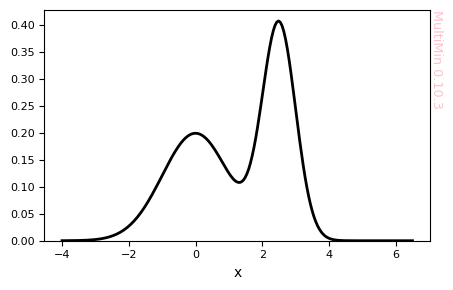

In [4]:
G_pdf = MoG.plot_pdf(
    properties=["x"],
    figsize=3
)
G_pdf.fig.savefig(f"gallery/{figprefix}_univariate_pdf.png")

We can plot a sample from the distribution:

MixtureOfGaussians.rvs executed in 0.49573612213134766 seconds


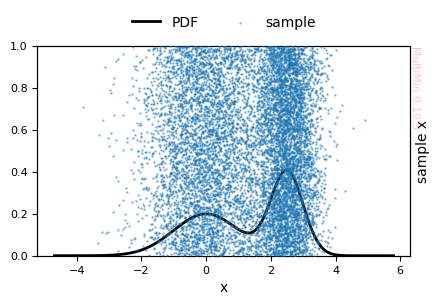

In [5]:
G = MoG.plot_sample(
    properties=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3
)
plt.savefig(f'gallery/{figprefix}_univariate_sample_hist.png')

### Multivariate normal distributions

Create a **Composed Multivariate Normal** (MoG) with one component:

Composition of ngauss = 1 gaussian multivariates of nvars = 2 random variables:
    Weights: [1.0]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0]]
    Standard deviations (σ): [[1.0, 1.0]]
    Correlation coefficients (ρ): [[0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (6):
            [p1,μ1_1,μ1_2,Σ1_11,Σ1_12,Σ1_22]
            [1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
        With std. and correlations (6):
            [p1,μ1_1,μ1_2,σ1_1,σ1_2,ρ1_12]
            [1.0, 0.0, 0.0, 1.0, 1.0, 0.0]


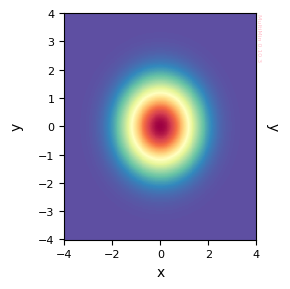

In [6]:
MoG=mn.MixtureOfGaussians(ngauss=1,nvars=2)
print(MoG)
G = MoG.plot_pdf(
    properties=["x", "y"],
    figsize=3,
    grid_size=400,
    colorbar=False,
    cmap="Spectral_r",
)
plt.savefig(f'gallery/{figprefix}_multivariate_1gauss_pdf.png')


Generate a random sample from the MoG:

In [7]:
sample = MoG.rvs(10000)

MixtureOfGaussians.rvs executed in 0.49674177169799805 seconds


Plot the sample (2D histograms):

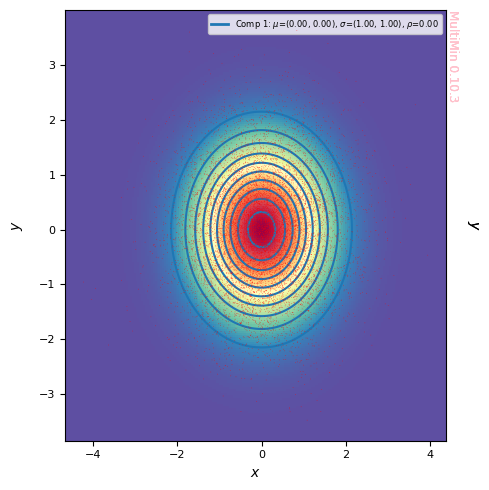

In [8]:
properties = dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
)
G = mn.MultiPlot(properties,figsize=5)

sargs = dict(s=0.2,edgecolor='None',color='r')
scat = G.sample_scatter(sample,**sargs)

pargs = dict(cmap='Spectral_r')
pdf = G.mog_pdf(MoG,**pargs)

cargs = dict(levels=10,decomp=True)
cont = G.mog_contour(MoG, **cargs)

plt.savefig(f'gallery/{figprefix}_2gauss_sample_density.png')

Other methods that you can use for objects of the class **MultiPlot** are:

In [9]:
mn.MultiPlot.describe()


Available methods for this object/class
  copy()
    Return a copy of the object.

  mog_contour()
    Plot the contours of a MoG on all panels of the MultiPlot. Ex. G.mog_contour(mog, levels=5, cmap='Reds')

  mog_pdf()
    Plot the PDF of a MoG on all panels of the MultiPlot. Ex. G.mog_pdf(mog, color='k', lw=2)

  reset_ranges()
    Reset ranges to match the data limits.

  sample_hist()
    Create a 2d-histograms of data on all panels of the MultiPlot. Ex. G.sample_hist(data, bins=100, cmap='viridis')

  sample_scatter()
    Scatter plot on all panels of the MultiPlot. Ex. G.sample_scatter(data, s=0.2, color='r')

  set_labels()
    Set labels parameters. Ex. set_labels(fontsize=12)

  set_ranges()
    Set ranges in panels according to ranges defined in dparameters.

  set_tick_params()
    Set tick parameters. Ex. set_tick_params(labelsize=10)

  tight_layout()
    Tight layout if no constrained_layout was used.



Create a MoG with **multiple** components (e.g. two Gaussians):

You can specify weights, means, and covariance matrices explicitly:

Composition of ngauss = 2 gaussian multivariates of nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0], [5.0, 5.0]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


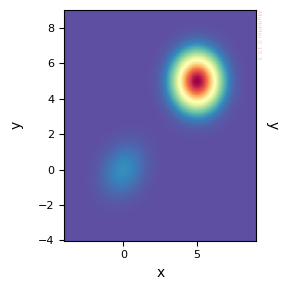

In [10]:
weights=[0.1,0.9]
mus=[[0,0],[5,5]]
Sigmas=[[[1,0.2],[0,1]],[[1,0],[0,1]]]
MND=mn.MixtureOfGaussians(mus=mus,weights=weights,Sigmas=Sigmas)
print(MND)
G = MND.plot_pdf(
    properties=["x", "y"],
    figsize=3,
    grid_size=400,
    colorbar=False,
    cmap="Spectral_r",
)
plt.savefig(f'gallery/{figprefix}_2gauss_pdf.png')

Or use a flat parameter list (weights, mus, sigmas, correlations):

In [11]:
params = [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 0.8, 0.2, 1.0, 1.0, 0.0, 1.0]
MoG = mn.MixtureOfGaussians(params=params,nvars=2)
print(MoG)

Composition of ngauss = 2 gaussian multivariates of nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0], [5.0, 5.0]]
    Standard deviations (σ): [[0.8944271909999159, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.223606797749979], [0.0]]

    Covariant matrices (Σ): 
        [[[0.8, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 0.8, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 0.8944271909999159, 1.0, 1.0, 1.0, 0.223606797749979, 0.0]


MixtureOfGaussians.rvs executed in 0.47878289222717285 seconds


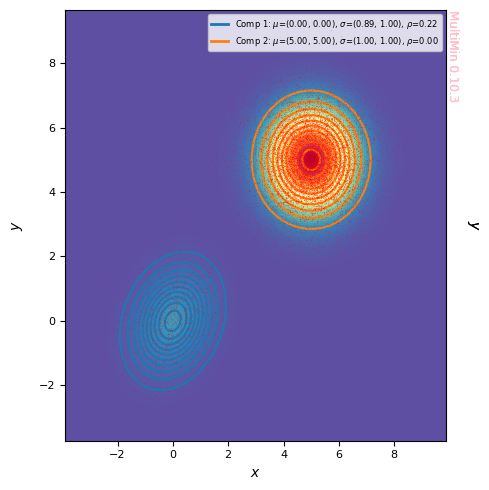

In [12]:
sample = MoG.rvs(10000)
G=mn.MultiPlot(properties,figsize=5)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.sample_scatter(sample,**sargs)

pargs=dict(cmap='Spectral_r')
pdf=G.mog_pdf(MoG,colorbar=False, **pargs)

cargs=dict(levels=10,decomp=True)
cont=G.mog_contour(MoG,**cargs)

plt.savefig(f'gallery/{figprefix}_1gauss_sample_density.png')

---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga